In [6]:
# At different charges
# Zero beam in simulation
# RL -> BO combo
# Fix Save BO


In [1]:
import matplotlib.pyplot as plt

from eval import (
    Episode,
    Study,
    plot_best_mae_box,
    plot_best_mae_diff_over_problem,
    plot_best_mae_over_time,
    plot_final_mae_box,
    plot_mae_over_time,
    plot_steps_to_convergence_box,
    plot_steps_to_threshold_box,
    problem_aligned,
)


In [2]:
FIG_DIR = "figures/bo_vs_rl"


In [3]:
rl_sim = Study.load("data/bo_vs_rl/simulation/rl", runs="*problem_*", name="RL (Sim)")
bo_sim = Study.load("data/bo_vs_rl/simulation/bo", name="BO (Sim)")

rl_real = Study.load("data/bo_vs_rl/real/rl", runs="*problem_*", name="RL (Real)")
bo_real = Study.load("data/bo_vs_rl/real/bo", runs="*problem_*", name="BO (Real)")

rl_real_2 = Study.load(
    "data/bo_vs_rl/real/rl", runs="20221117*_problem*", name="RL (Trio)"
)
bo_real_2 = Study.load(
    "data/bo_vs_rl/real/bo", runs="20221117*_problem*", name="BO EI (Trio)"
)
bo_ucb_real_2 = Study.load(
    "data/bo_vs_rl/real/bo_ucb",
    runs="20221117*_problem*",
    name="BO UCB (Trio)",
)
charge_study_bo = Study.load(
    "data/bo_vs_rl/real/bo", runs="20221201*problem*", name="BO (over charges)"
)
charge_study_rl = Study.load(
    "data/bo_vs_rl/real/rl", runs="20221201*problem*", name="RL (over charges)"
)
safe_bo_sim = Study.load(
    "data/bo_vs_rl/simulation/safe_bo", runs="problem_*", name="Safe-BO"
)


In [10]:
zero_sim = Study(
    [
        episode
        for episode in rl_sim.episodes
        if episode.target[1] == 0 and episode.target[3] == 0
    ],
    name="Zero Sim",
)
zero_real = Study(
    [
        episode
        for episode in rl_real.episodes
        if episode.target[1] == 0 and episode.target[3] == 0
    ],
    name="Zero Real",
)

nonzero_sim = Study(
    [
        episode
        for episode in rl_sim.episodes
        if episode.target[1] != 0 or episode.target[3] != 0
    ],
    name="Non-Zero Sim",
)
nonzero_real = Study(
    [
        episode
        for episode in rl_real.episodes
        if episode.target[1] != 0 or episode.target[3] != 0
    ],
    name="Non-Zero Real",
)


In [11]:
all_studies = [
    rl_sim,
    bo_sim,
    rl_real,
    bo_real,
    rl_real_2,
    bo_real_2,
    bo_ucb_real_2,
    zero_sim,
    zero_real,
    safe_bo_sim,
]


In [12]:
for study in all_studies:
    lengths = [len(episode) for episode in study.episodes]
    print(f"Lengths in {study.name} -> {min(lengths)} / {max(lengths)}")


Lengths in RL (Sim) -> 151 / 151
Lengths in BO (Sim) -> 152 / 152
Lengths in RL (Real) -> 51 / 51
Lengths in BO (Real) -> 77 / 102
Lengths in RL (Trio) -> 51 / 51
Lengths in BO EI (Trio) -> 77 / 77
Lengths in BO UCB (Trio) -> 77 / 77
Lengths in Zero Sim -> 151 / 151
Lengths in Zero Real -> 51 / 51
Lengths in Safe-BO -> 53 / 151


### Summary

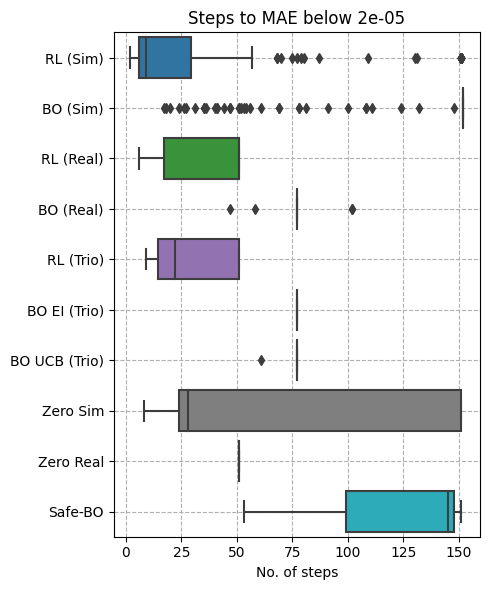

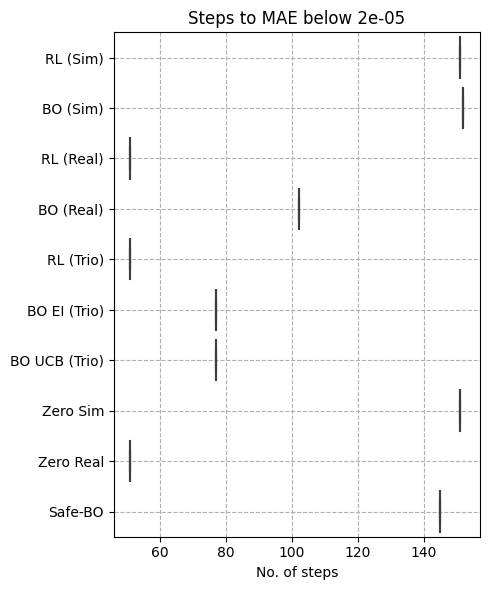

In [13]:
plot_steps_to_threshold_box(all_studies, save_path=f"{FIG_DIR}/steps_to_target.pdf")

plot_steps_to_threshold_box(
    problem_aligned(all_studies), save_path=f"{FIG_DIR}/steps_to_target_intersected.pdf"
)


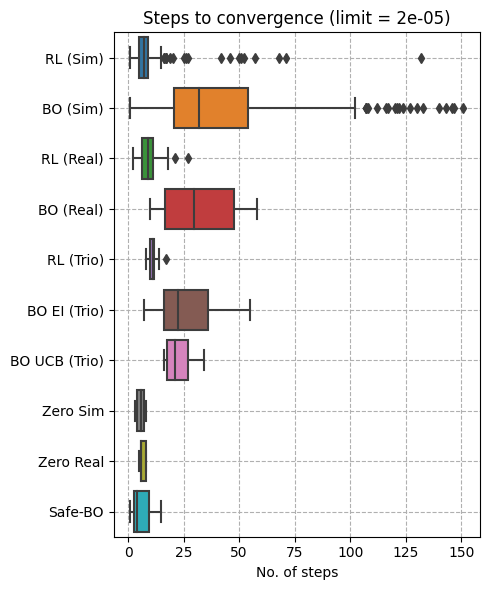

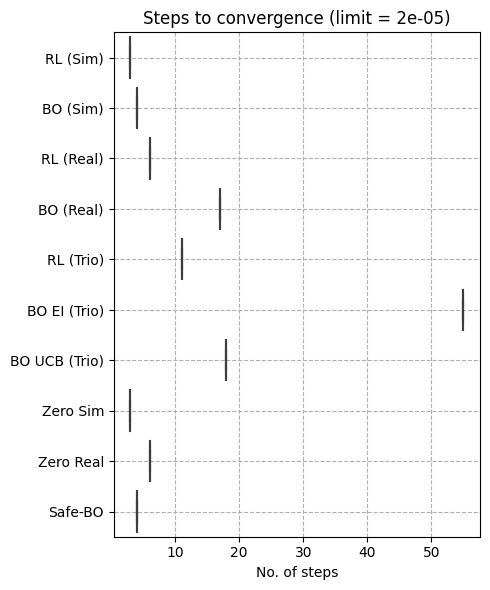

In [14]:
plot_steps_to_convergence_box(
    all_studies,
    save_path=f"{FIG_DIR}/steps_to_convergence.pdf",
)

plot_steps_to_convergence_box(
    problem_aligned(all_studies),
    save_path=f"{FIG_DIR}/steps_to_convergence.pdf",
)


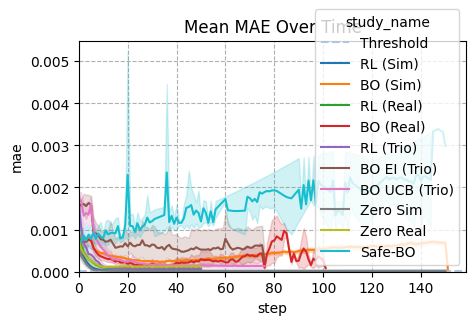

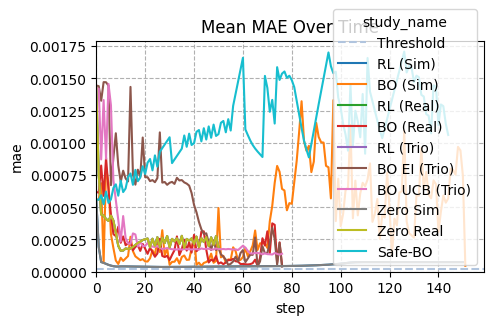

In [11]:
plot_mae_over_time(
    all_studies,
    threshold=20e-6,
    save_path=f"{FIG_DIR}/mae_over_time.pdf",
)

plot_mae_over_time(
    problem_aligned(all_studies),
    threshold=20e-6,
    save_path=f"{FIG_DIR}/mae_over_time.pdf",
)


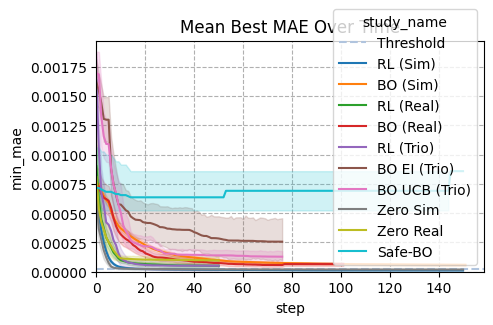

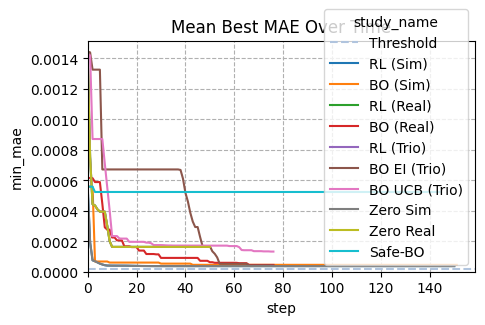

In [12]:
plot_best_mae_over_time(
    all_studies,
    threshold=20e-6,
    save_path=f"{FIG_DIR}/best_mae_over_time.pdf",
)

plot_best_mae_over_time(
    problem_aligned(all_studies),
    threshold=20e-6,
    save_path=f"{FIG_DIR}/best_mae_over_time.pdf",
)


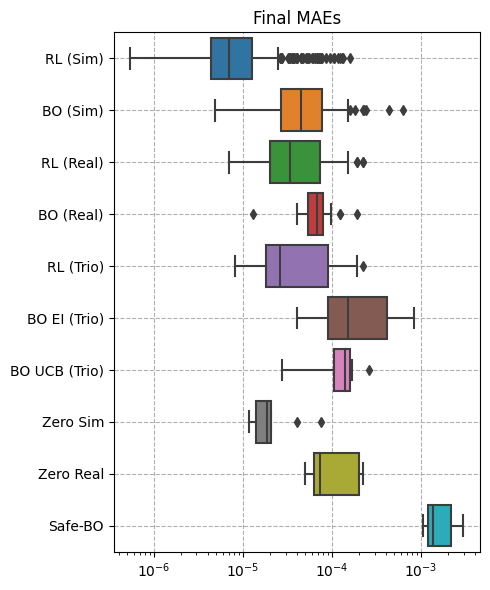

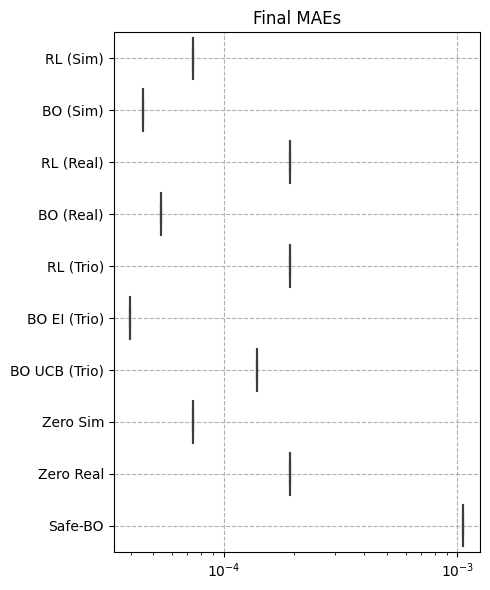

In [13]:
plot_final_mae_box(
    all_studies,
    save_path=f"{FIG_DIR}/final_mae.pdf",
)

plot_final_mae_box(
    problem_aligned(all_studies),
    save_path=f"{FIG_DIR}/final_mae.pdf",
)


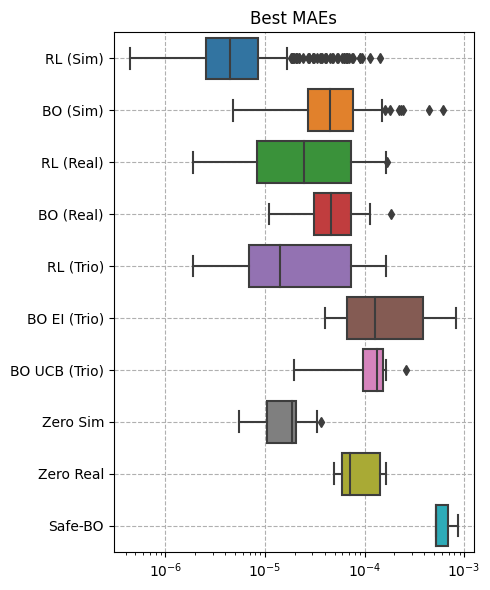

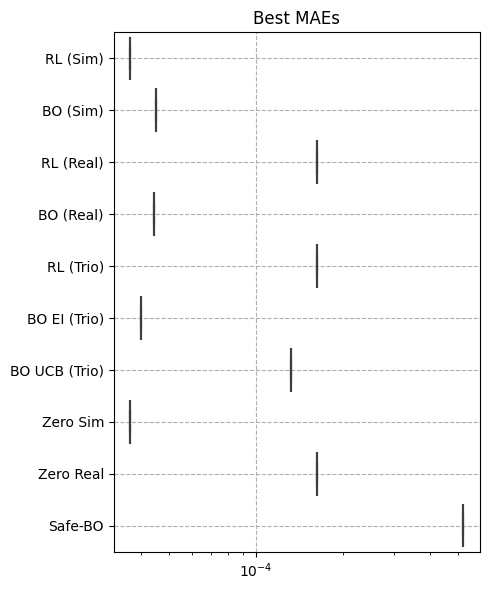

In [14]:
plot_best_mae_box(
    all_studies,
    save_path=f"{FIG_DIR}/final_best_mae.pdf",
)

plot_best_mae_box(
    problem_aligned(all_studies),
    save_path=f"{FIG_DIR}/final_best_mae.pdf",
)


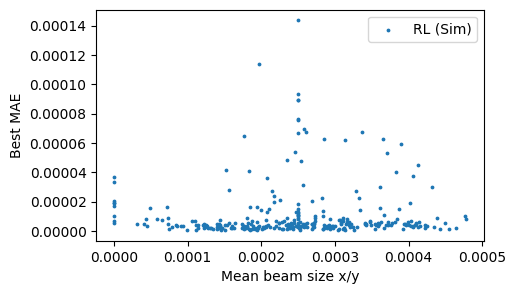

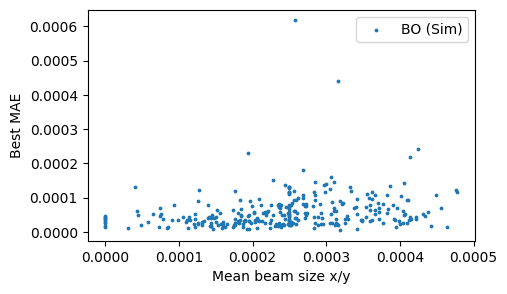

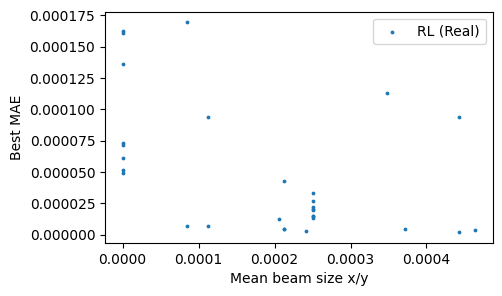

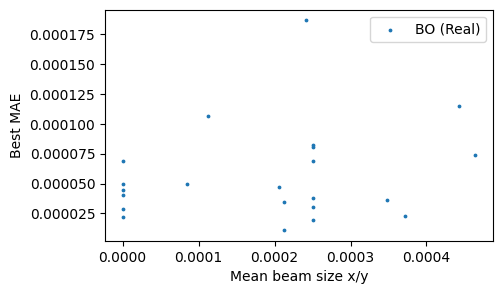

In [15]:
for study in [rl_sim, bo_sim, rl_real, bo_real]:
    study.plot_target_beam_size_mae_correlation()


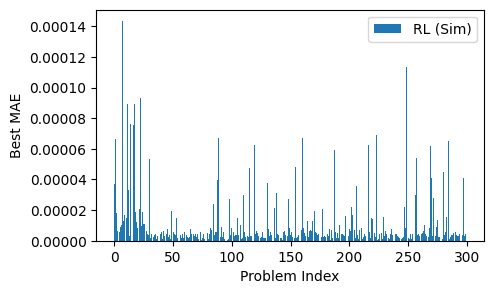

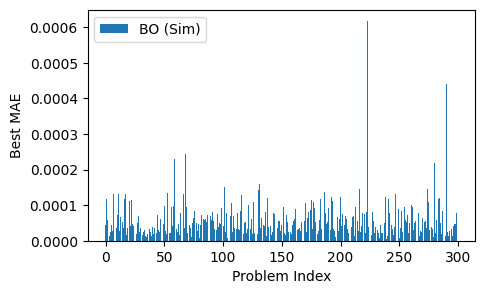

AssertionError: There are duplicate problems in this study.

In [16]:
for study in [rl_sim, bo_sim, rl_real, bo_real]:
    study.plot_best_mae_over_problem()


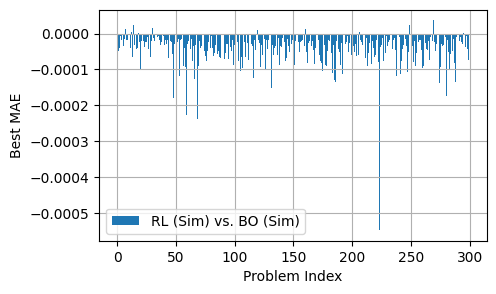

AssertionError: The problems in study 1 are note unique.

In [17]:
plot_best_mae_diff_over_problem(
    study_1=rl_sim,
    study_2=bo_sim,
)

plot_best_mae_diff_over_problem(
    study_1=rl_real,
    study_2=bo_real,
)


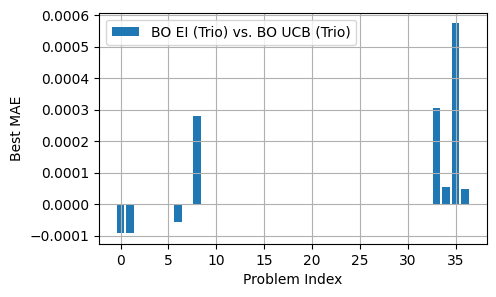

In [18]:
plot_best_mae_diff_over_problem(
    study_1=bo_real_2,
    study_2=bo_ucb_real_2,
)


In [19]:
import numpy as np
import matplotlib.pyplot as plt


In [20]:
for episode in rl_real:
    actions = np.stack(episode["actions"])
    normalized = actions / [72, 72, 6.1782e-3, 72, 6.1782e-3]
    action_sizes = np.max(np.abs(normalized), axis=1)

    maes = get_maes(episode)

    plt.figure(figsize=(10, 3))
    plt.subplot(121)
    plt.title("Action Size")
    plt.plot(action_sizes)
    plt.ylim(0, 0.055)
    plt.subplot(122)
    plt.title("MAE")
    plt.plot(maes)
    plt.ylim(0, 0.0005)
    plt.show()


TypeError: 'Study' object is not iterable

In [21]:
1, 4


(1, 4)

In [22]:
rl_real[1]["observations"][0]["target"]


TypeError: 'Study' object is not subscriptable

In [23]:
rl_real[4]["observations"][0]["target"]


TypeError: 'Study' object is not subscriptable

In [24]:
for episode in rl_real:
    actions = np.stack(episode["actions"])
    normalized = actions / [72, 72, 6.1782e-3, 72, 6.1782e-3]
    normalized = normalized

    plt.figure(figsize=(5, 3))
    plt.title("Action Size")
    plt.plot(normalized[:, 0], label="Q1")
    plt.plot(normalized[:, 1], label="Q2")
    plt.plot(normalized[:, 2], label="CV")
    plt.plot(normalized[:, 3], label="Q3")
    plt.plot(normalized[:, 4], label="CH")
    plt.legend()
    plt.show()


TypeError: 'Study' object is not iterable

In [25]:
rl_real[0]["observations"][0]["beam"]


TypeError: 'Study' object is not subscriptable

In [26]:
for episode in rl_real:
    beams = np.stack([obs["beam"] for obs in episode["observations"]])
    targets = np.stack([obs["target"] for obs in episode["observations"]])

    diffs = beams - targets

    plt.figure(figsize=(5, 3))
    plt.title("Beam Parameters")
    plt.plot(diffs[:, 0], label="mux")
    plt.plot(diffs[:, 1], label="sigmax")
    plt.plot(diffs[:, 2], label="muy")
    plt.plot(diffs[:, 3], label="sigmay")
    plt.legend()
    plt.show()


TypeError: 'Study' object is not iterable

In [27]:
for episode in rl_real:
    magnets = np.stack([obs["magnets"] for obs in episode["observations"]])
    normalized = magnets / [72, 72, 6.1782e-3, 72, 6.1782e-3]

    plt.figure(figsize=(5, 3))
    plt.title("Magnet Settings")
    plt.plot(normalized[:, 0], label="Q1")
    plt.plot(normalized[:, 1], label="Q2")
    plt.plot(normalized[:, 2], label="CV")
    plt.plot(normalized[:, 3], label="Q3")
    plt.plot(normalized[:, 4], label="CH")
    plt.legend()
    plt.show()


TypeError: 'Study' object is not iterable

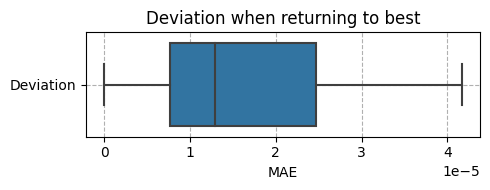

In [28]:
bo_real.plot_best_return_deviation_box()


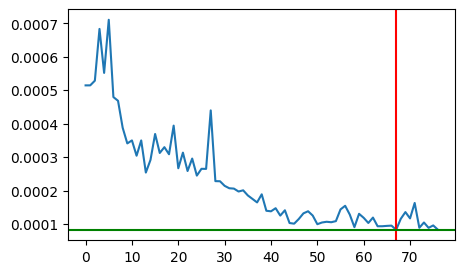

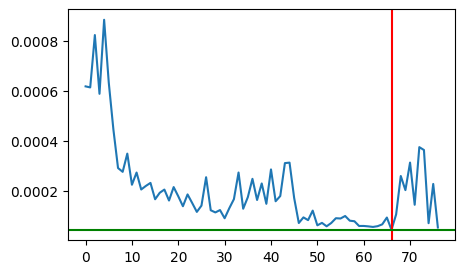

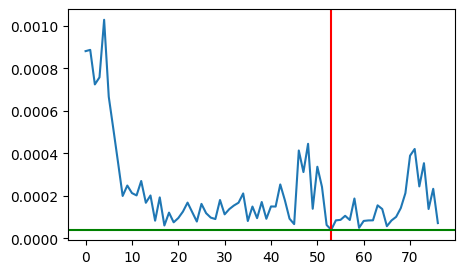

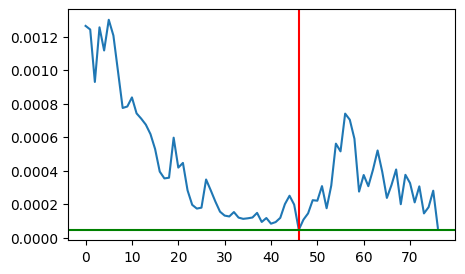

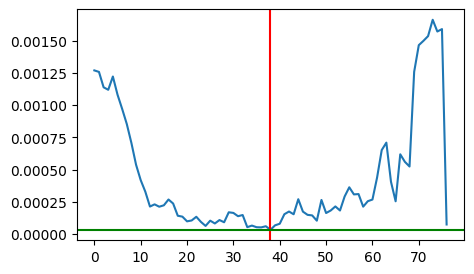

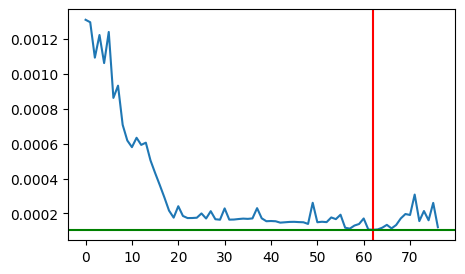

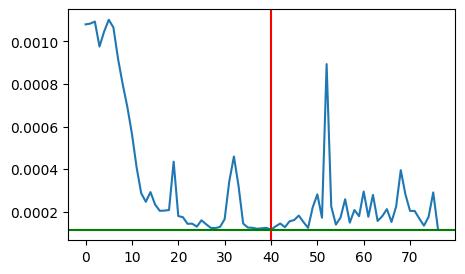

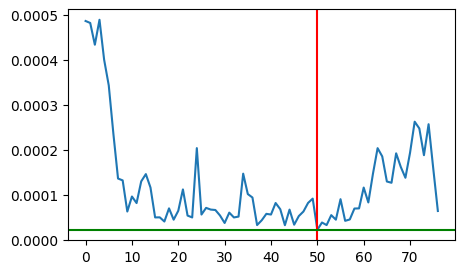

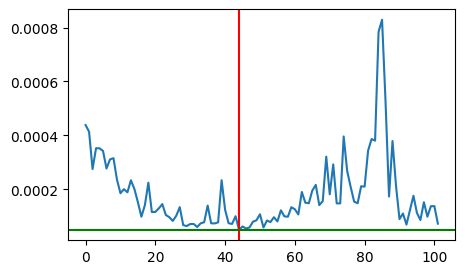

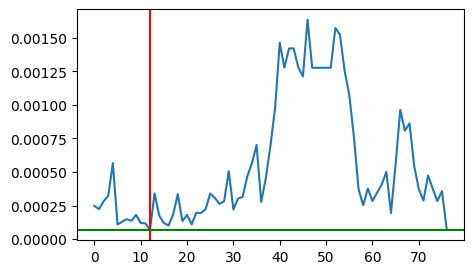

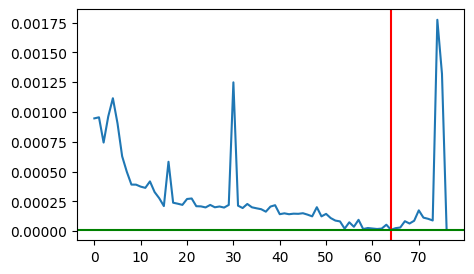

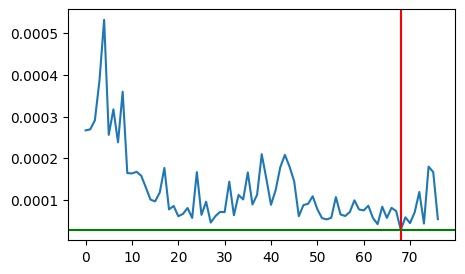

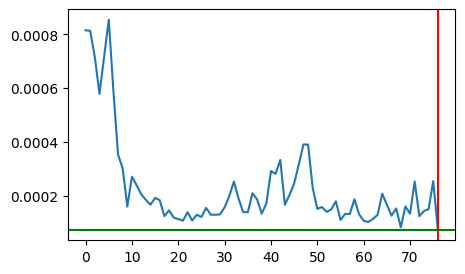

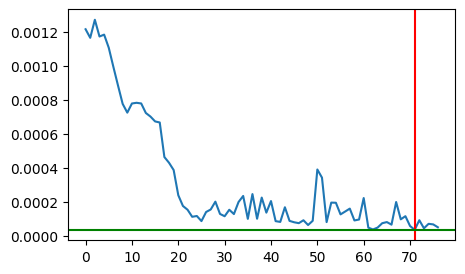

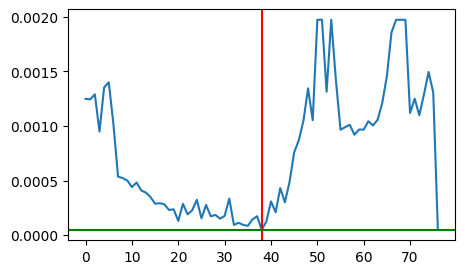

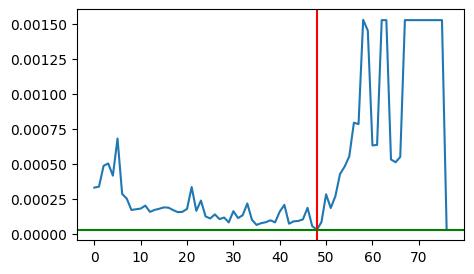

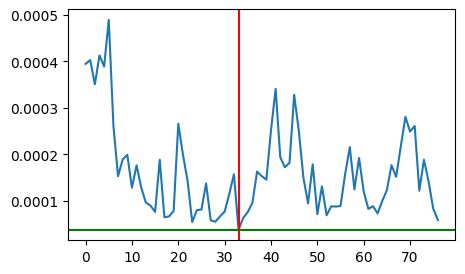

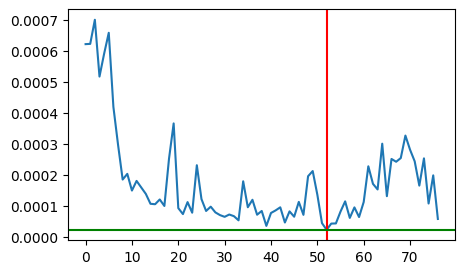

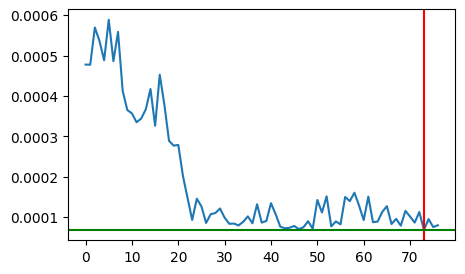

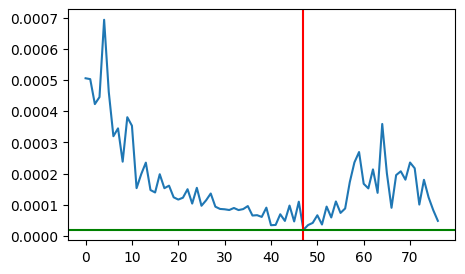

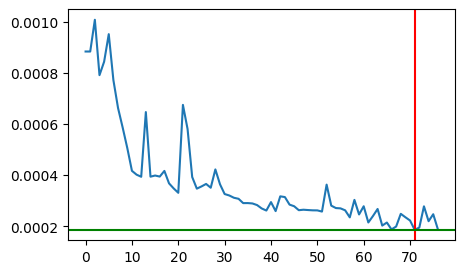

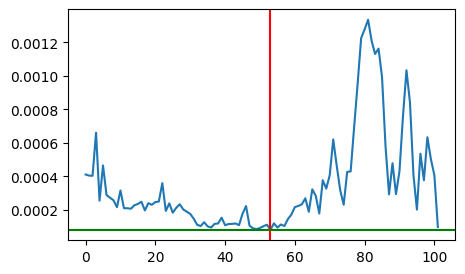

In [29]:
for episode in bo_real.episodes:
    episode.plot_best_return_deviation_example()


In [30]:
import matplotlib.pyplot as plt

bo_zeros = [
    "202209291424_problem_000",
    "202210181419_problemx_000",
    "202211101314_problemx_000",
]
bo_zeros = [f"data/bo_vs_rl/real/bo/{d}/recorded_episode_1.pkl" for d in bo_zeros]
bo_zeros = [load_episode_data(path) for path in bo_zeros]

maes = [get_maes(episode) for episode in bo_zeros]

plt.figure(figsize=(5, 3))
for episode in maes:
    plt.plot(episode)
plt.title("BO")
plt.grid(ls="--")
plt.gca().set_axisbelow(True)
plt.show()

rl_zeros = [
    "202209291443_problem_000",
    "202210181433_problemx_000",
    "202211101329_problem_000",
]
rl_zeros = [f"data/bo_vs_rl/real/rl/{d}/recorded_episode_1.pkl" for d in rl_zeros]
rl_zeros = [load_episode_data(path) for path in rl_zeros]

maes = [get_maes(episode) for episode in rl_zeros]

plt.figure(figsize=(5, 3))
for episode in maes:
    plt.plot(episode)
plt.title("RL")
plt.grid(ls="--")
plt.gca().set_axisbelow(True)
plt.show()


NameError: name 'load_episode_data' is not defined

In [31]:
import matplotlib.pyplot as plt

bo_zeros = [
    "202209291424_problem_000",
    "202210181419_problemx_000",
    "202211101314_problemx_000",
]
bo_zeros = [f"data/bo_vs_rl/real/bo/{d}/recorded_episode_1.pkl" for d in bo_zeros]
bo_zeros = [load_episode_data(path) for path in bo_zeros]

maes = [get_maes(episode) for episode in bo_zeros]
min_maes = [compute_min_maes(episode) for episode in maes]

plt.figure(figsize=(5, 3))
for episode in min_maes:
    plt.plot(episode)
plt.title("BO")
plt.grid(ls="--")
plt.gca().set_axisbelow(True)
plt.show()

rl_zeros = [
    "202209291443_problem_000",
    "202210181433_problemx_000",
    "202211101329_problem_000",
]
rl_zeros = [f"data/bo_vs_rl/real/rl/{d}/recorded_episode_1.pkl" for d in rl_zeros]
rl_zeros = [load_episode_data(path) for path in rl_zeros]

maes = [get_maes(episode) for episode in rl_zeros]
min_maes = [compute_min_maes(episode) for episode in maes]

plt.figure(figsize=(5, 3))
for episode in min_maes:
    plt.plot(episode)
plt.title("RL")
plt.grid(ls="--")
plt.gca().set_axisbelow(True)
plt.show()


NameError: name 'load_episode_data' is not defined

In [32]:
import matplotlib.pyplot as plt

bo_33s = ["202210181626_problem_033", "202211101452_problemx_033"]
bo_33s = [f"data/bo_vs_rl/real/bo/{d}/recorded_episode_1.pkl" for d in bo_33s]
bo_33s = [load_episode_data(path) for path in bo_33s]

maes = [get_maes(episode) for episode in bo_33s]

plt.figure(figsize=(5, 3))
for episode in maes:
    plt.plot(episode)
plt.title("BO")
plt.grid(ls="--")
plt.gca().set_axisbelow(True)
plt.show()

rl_33s = ["202210181640_problem_033", "202211101507_problemx_033"]
rl_33s = [f"data/bo_vs_rl/real/rl/{d}/recorded_episode_1.pkl" for d in rl_33s]
rl_33s = [load_episode_data(path) for path in rl_33s]

maes = [get_maes(episode) for episode in rl_33s]

plt.figure(figsize=(5, 3))
for episode in maes:
    plt.plot(episode)
plt.title("RL")
plt.grid(ls="--")
plt.gca().set_axisbelow(True)
plt.show()


NameError: name 'load_episode_data' is not defined

In [33]:
import matplotlib.pyplot as plt

bo_33s = ["202210181626_problem_033", "202211101452_problemx_033"]
bo_33s = [f"data/bo_vs_rl/real/bo/{d}/recorded_episode_1.pkl" for d in bo_33s]
bo_33s = [load_episode_data(path) for path in bo_33s]

maes = [get_maes(episode) for episode in bo_33s]
min_maes = [compute_min_maes(episode) for episode in maes]

plt.figure(figsize=(5, 3))
for episode in min_maes:
    plt.plot(episode)
plt.title("BO")
plt.grid(ls="--")
plt.gca().set_axisbelow(True)
plt.show()

rl_33s = ["202210181640_problem_033", "202211101507_problemx_033"]
rl_33s = [f"data/bo_vs_rl/real/rl/{d}/recorded_episode_1.pkl" for d in rl_33s]
rl_33s = [load_episode_data(path) for path in rl_33s]

maes = [get_maes(episode) for episode in rl_33s]
min_maes = [compute_min_maes(episode) for episode in maes]

plt.figure(figsize=(5, 3))
for episode in min_maes:
    plt.plot(episode)
plt.title("RL")
plt.grid(ls="--")
plt.gca().set_axisbelow(True)
plt.show()


NameError: name 'load_episode_data' is not defined

In [34]:
import numpy as np

size_maes = []
for episode in zero_sim.episodes:
    final = episode.observations[-1]["beam"] - episode.observations[-1]["target"]
    error = np.abs(final)
    size_mae = (error[1] + error[3]) / 2
    size_maes.append(size_mae)
print(np.mean(size_maes), np.std(size_maes))

sim_mean = np.mean(size_maes)

size_maes = []
for episode in zero_real.episodes:
    final = episode.observations[-1]["beam"] - episode.observations[-1]["target"]
    error = np.abs(final)
    size_mae = (error[1] + error[3]) / 2
    size_maes.append(size_mae)
print(np.mean(size_maes), np.std(size_maes))

real_mean = np.mean(size_maes)

print(real_mean / sim_mean)

print("-------------------")

size_maes = []
for episode in nonzero_sim.episodes:
    final = episode.observations[-1]["beam"] - episode.observations[-1]["target"]
    error = np.abs(final)
    size_mae = (error[1] + error[3]) / 2
    size_maes.append(size_mae)
print(np.mean(size_maes), np.std(size_maes))

sim_mean = np.mean(size_maes)

size_maes = []
for episode in nonzero_real.episodes:
    final = episode.observations[-1]["beam"] - episode.observations[-1]["target"]
    error = np.abs(final)
    size_mae = (error[1] + error[3]) / 2
    size_maes.append(size_mae)
print(np.mean(size_maes), np.std(size_maes))

real_mean = np.mean(size_maes)

print(real_mean / sim_mean)


3.4377415431663394e-05 2.055988913573149e-05
0.0001545461254863767 9.719504047818383e-05
4.495571396098371
-------------------
2.0501491254088758e-05 4.025023454685542e-05
5.591014269157313e-05 6.81167412427532e-05
2.7271256514290183


In [35]:
aligned_zero_sim, aligned_zero_real = problem_aligned([zero_sim, zero_real])
aligned_nonzero_sim, aligned_nonzero_real = problem_aligned([nonzero_sim, nonzero_real])


def compute_size_mae(episode: Episode) -> float:
    final = episode.observations[-1]["beam"] - episode.observations[-1]["target"]
    error = np.abs(final)
    size_mae = (error[1] + error[3]) / 2
    return size_mae


for sim, real in zip(aligned_zero_sim.episodes, aligned_zero_real.episodes):
    sim_size_mae = compute_size_mae(sim)
    real_size_mae = compute_size_mae(real)
    print(
        f"{sim.problem_index} vs. {real.problem_index} -> {real_size_mae / sim_size_mae = :.2f}"
    )

print("--------")

for sim, real in zip(aligned_nonzero_sim.episodes, aligned_nonzero_real.episodes):
    sim_size_mae = compute_size_mae(sim)
    real_size_mae = compute_size_mae(real)
    print(
        f"{sim.problem_index} vs. {real.problem_index} -> {real_size_mae / sim_size_mae = :.2f}"
    )


0 vs. 0 -> real_size_mae / sim_size_mae = 2.85
3 vs. 3 -> real_size_mae / sim_size_mae = 4.56
6 vs. 6 -> real_size_mae / sim_size_mae = 5.82
9 vs. 9 -> real_size_mae / sim_size_mae = 3.06
24 vs. 24 -> real_size_mae / sim_size_mae = 2.53
--------
32 vs. 32 -> real_size_mae / sim_size_mae = 1.58
33 vs. 33 -> real_size_mae / sim_size_mae = 2.28
2 vs. 2 -> real_size_mae / sim_size_mae = 1.28
1 vs. 1 -> real_size_mae / sim_size_mae = 0.25
36 vs. 36 -> real_size_mae / sim_size_mae = 465.86
5 vs. 5 -> real_size_mae / sim_size_mae = 2.85
4 vs. 4 -> real_size_mae / sim_size_mae = 5.58
7 vs. 7 -> real_size_mae / sim_size_mae = 0.10
8 vs. 8 -> real_size_mae / sim_size_mae = 1.34
37 vs. 37 -> real_size_mae / sim_size_mae = 1.13
42 vs. 42 -> real_size_mae / sim_size_mae = 53.65
34 vs. 34 -> real_size_mae / sim_size_mae = 8.12
35 vs. 35 -> real_size_mae / sim_size_mae = 51.57
30 vs. 30 -> real_size_mae / sim_size_mae = 0.04
31 vs. 31 -> real_size_mae / sim_size_mae = 1.05


In [36]:
nonzero_sim.get_episodes_by_problem(36)[0].observations[-1]["target"]


array([ 0.00130596,  0.00044123, -0.00148354,  0.00044417], dtype=float32)

In [37]:
nonzero_sim.get_episodes_by_problem(7)[0].observations[-1]["target"]


array([0.001 , 0.0005, 0.    , 0.    ], dtype=float32)

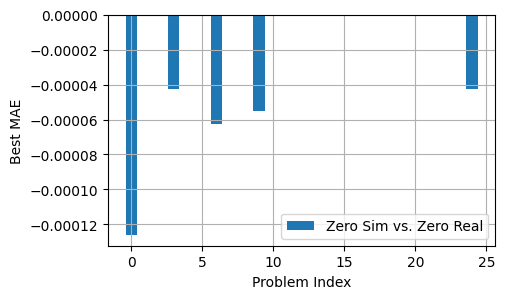

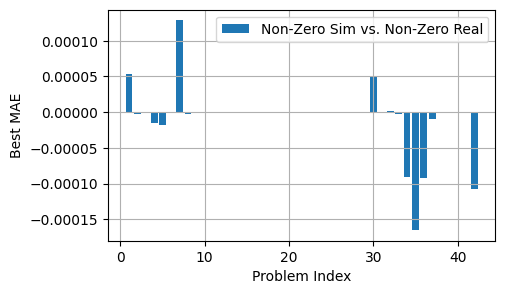

In [38]:
plot_best_mae_diff_over_problem(aligned_zero_sim, aligned_zero_real)
plot_best_mae_diff_over_problem(aligned_nonzero_sim, aligned_nonzero_real)


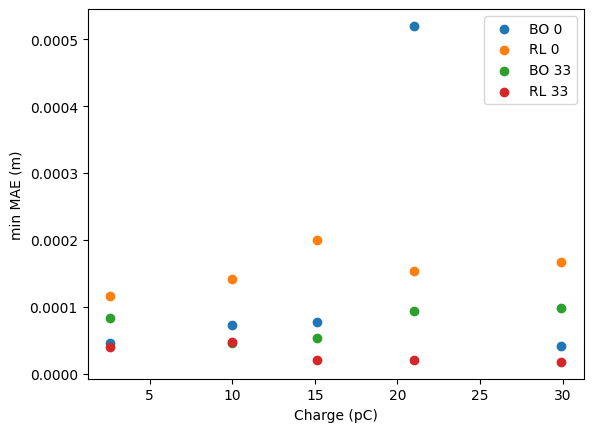

In [5]:
charges_pC = [2.6, 10.0, 21.0, 29.9, 15.1]

zero_over_charges_bo = Study(
    [episode for episode in charge_study_bo.episodes if episode.problem_index == 0]
)
zero_over_charges_rl = Study(
    [episode for episode in charge_study_rl.episodes if episode.problem_index == 0]
)
large_over_charges_bo = Study(
    [episode for episode in charge_study_bo.episodes if episode.problem_index == 33]
)
large_over_charges_rl = Study(
    [episode for episode in charge_study_rl.episodes if episode.problem_index == 33]
)

plt.scatter(
    charges_pC,
    [min(episode.maes()) for episode in zero_over_charges_bo.episodes],
    label="BO 0",
)
plt.scatter(
    charges_pC,
    [min(episode.maes()) for episode in zero_over_charges_rl.episodes],
    label="RL 0",
)
plt.scatter(
    charges_pC,
    [min(episode.maes()) for episode in large_over_charges_bo.episodes],
    label="BO 33",
)
plt.scatter(
    charges_pC,
    [min(episode.maes()) for episode in large_over_charges_rl.episodes],
    label="RL 33",
)
plt.xlabel("Charge (pC)")
plt.ylabel("min MAE (m)")
plt.legend()
plt.show()


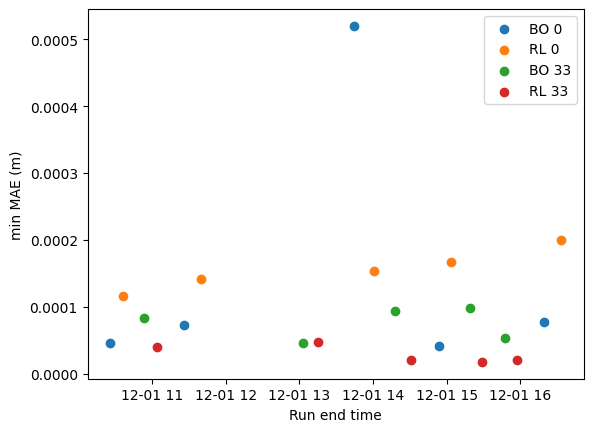

In [10]:
plt.scatter(
    [episode.t_end for episode in zero_over_charges_bo.episodes],
    [min(episode.maes()) for episode in zero_over_charges_bo.episodes],
    label="BO 0",
)
plt.scatter(
    [episode.t_end for episode in zero_over_charges_rl.episodes],
    [min(episode.maes()) for episode in zero_over_charges_rl.episodes],
    label="RL 0",
)
plt.scatter(
    [episode.t_end for episode in large_over_charges_bo.episodes],
    [min(episode.maes()) for episode in large_over_charges_bo.episodes],
    label="BO 33",
)
plt.scatter(
    [episode.t_end for episode in large_over_charges_rl.episodes],
    [min(episode.maes()) for episode in large_over_charges_rl.episodes],
    label="RL 33",
)
plt.xlabel("Run end time")
plt.ylabel("min MAE (m)")
plt.legend()
plt.show()


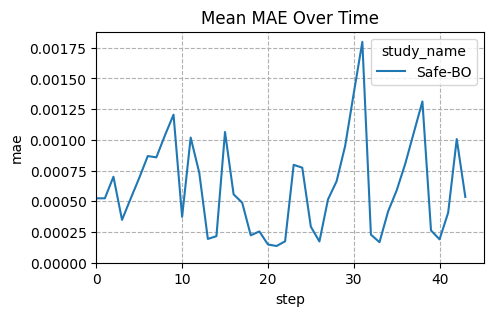

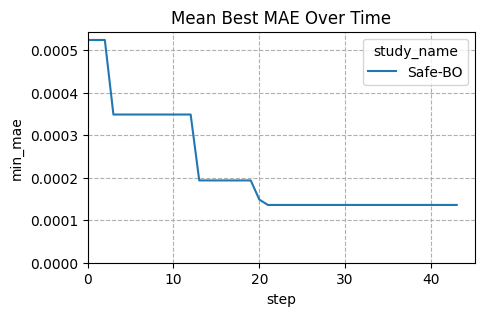

In [4]:
# safe_bo_sim = Study.load(
#     "data/bo_vs_rl/simulation/safe_bo", runs="problem_34", name="Safe-BO"
# )
# single = Study([safe_bo_sim.episodes], name="Single")
plot_mae_over_time([safe_bo_sim])
plot_best_mae_over_time([safe_bo_sim])


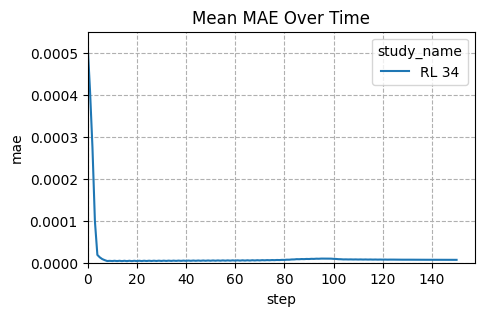

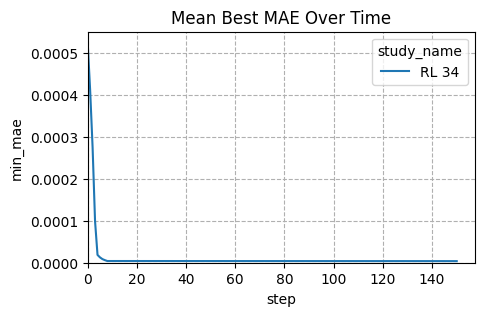

In [7]:
rl_34 = Study([episode for episode in rl_sim.episodes if episode.problem_index == 34], name="RL 34")

plot_mae_over_time([rl_34])
plot_best_mae_over_time([rl_34])

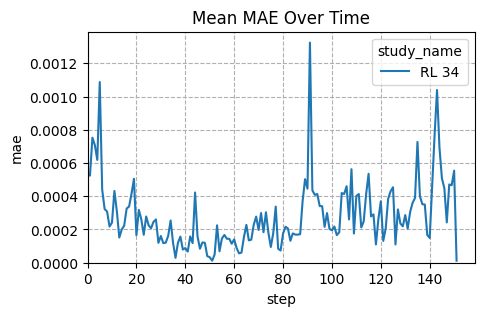

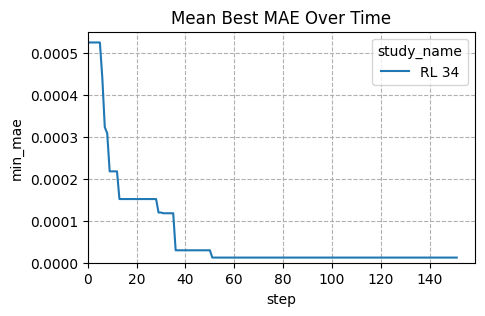

In [8]:
bo_34 = Study([episode for episode in bo_sim.episodes if episode.problem_index == 34], name="RL 34")

plot_mae_over_time([bo_34])
plot_best_mae_over_time([bo_34])